In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv('Netflix_dataset.csv')

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [4]:
movie.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
2388/movie.shape[0] * 100
# 30% data is missing we can delete this column 

718/movie.shape[0] * 100
# 9.21% data is missing 

507/movie.shape[0] * 100
# 6.50% data is missing

6.509179612273719

## duplicate data 

In [6]:
movie[movie.duplicated()]

Show_Id Category              Title        Director  \
6300    s684    Movie           Backfire     Dave Patten   
6622   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast        Country  \
6300  Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
6622  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   

           Release_Date Rating Duration  \
6300      April 5, 2019  TV-MA   97 min   
6622  September 4, 2020  TV-MA   94 min   

                                       Type  \
6300  Dramas, Independent Movies, Thrillers   
6622   Comedies, Dramas, Independent Movies   

                                            Description  
6300  When two would-be robbers accidentally kill a ...  
6622  A disillusioned security guard transforms into...

In [7]:
movie.drop_duplicates(inplace = True)
movie.duplicated().sum()

0

## null value using heatmap 

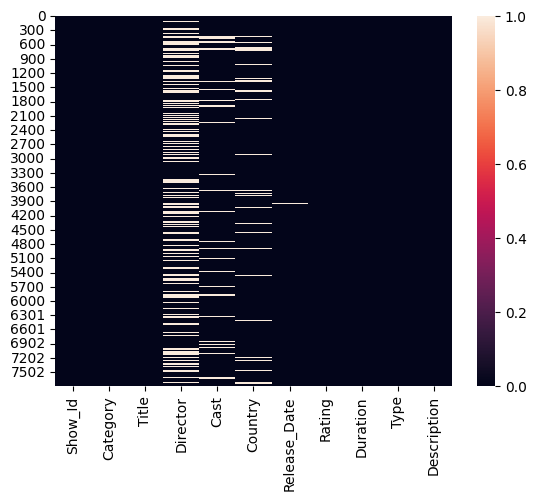

In [8]:
sns.heatmap(movie.isnull())
plt.show()

## For 'House of cards' , what is the show id and who is director of this show ?

In [9]:
movie[movie.Title == 'House of Cards']

Show_Id Category           Title  \
2832   s2833  TV Show  House of Cards   

                                               Director  \
2832  Robin Wright, David Fincher, Gerald McRaney, J...   

                                                   Cast        Country  \
2832  Kevin Spacey, Robin Wright, Kate Mara, Corey S...  United States   

          Release_Date Rating   Duration                     Type  \
2832  November 2, 2018  TV-MA  6 Seasons  TV Dramas, TV Thrillers   

                                            Description  
2832  A ruthless politician will stop at nothing to ...

## In which year highest number of the TV shows & movies were released ? 

In [10]:
movie.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

#### convert release_Data into datetime 

In [11]:
movie.Release_Date = pd.to_datetime(movie.Release_Date)
movie.Release_Date.head()

0   2020-08-14
1   2016-12-23
2   2018-12-20
3   2017-11-16
4   2020-01-01
Name: Release_Date, dtype: datetime64[ns]

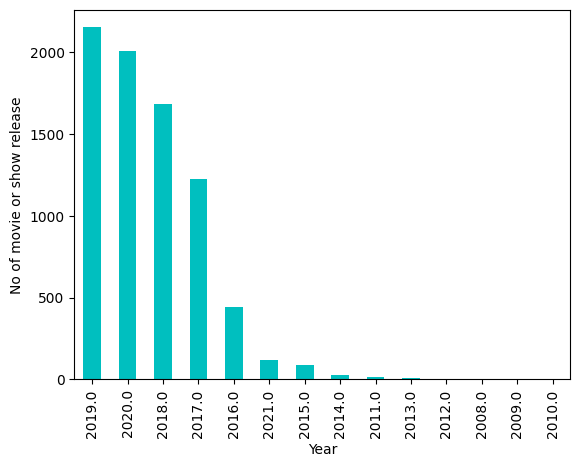

In [12]:
movie.Release_Date.dt.year.value_counts().plot(kind='bar' , color='c')
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('No of movie or show release')
plt.show()

## How many percentage covered by movie shows are in the dataset based on category ? 

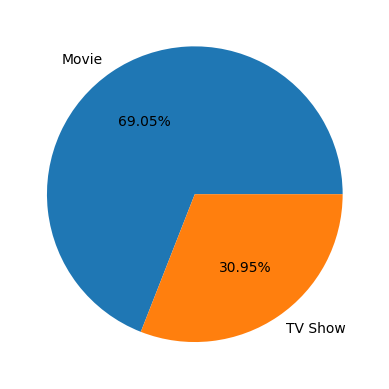

Category
Movie      5377
TV Show    2410
dtype: int64

In [13]:
movie.groupby('Category').size().plot(kind='pie' , autopct='%.2f%%')
#sns.countplot(movie.groupby('Category').size().values)
plt.show()
movie.groupby('Category').size()

In [14]:
#movie.dropna(subset=['Release_Date'] , inplace=True)
movie['year'] = movie.Release_Date.dt.year
movie[(movie.Category == 'Movie') & (movie.year == 2020)]

Show_Id Category                                    Title  \
4         s5    Movie                                       21   
6         s7    Movie                                      122   
14       s15    Movie                                     3022   
27       s28    Movie                                   #Alive   
28       s29    Movie            #AnneFrank - Parallel Stories   
...      ...      ...                                      ...   
7762   s7761    Movie                                Zaki Chan   
7783   s7782    Movie                                     Zoom   
7784   s7783    Movie                                     Zozo   
7786   s7785    Movie                        Zulu Man in Japan   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                         Director  \
4                  Robert Luketic   
6                 Yasir Al Yasiri   
14                     John Suits   
27                         Cho Il   
28    Sabina Fedeli, Anna Migotto   
...                           ...   
7762                   Wael Ihsan   
7783                 Peter Hewitt   
7784                  Josef Fares   
7786                          NaN   
7788                     Sam Dunn   

                                                   Cast  \
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
14    Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   
27                             Yoo Ah-in, Park Shin-hye   
28                          Helen Mirren, Gengher Gatti   
...                                                 ...   
7762  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   
7783  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7784  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7786                                            Nasty C   
7788                                                NaN   

                                                Country Release_Date Rating  \
4                                         United States   2020-01-01  PG-13   
6                                                 Egypt   2020-06-01  TV-MA   
14                                        United States   2020-03-19      R   
27                                          South Korea   2020-09-08  TV-MA   
28                                                Italy   2020-07-01  TV-14   
...                                                 ...          ...    ...   
7762                                              Egypt   2020-05-19  TV-PG   
7783                                      United States   2020-01-11     PG   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7786                                                NaN   2020-09-25  TV-MA   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

     Duration                                               Type  \
4     123 min                                             Dramas   
6      95 min                Horror Movies, International Movies   
14     91 min    Independent Movies, Sci-Fi & Fantasy, Thrillers   
27     99 min     Horror Movies, International Movies, Thrillers   
28     95 min                Documentaries, International Movies   
...       ...                                                ...   
7762  109 min    Comedies, International Movies, Romantic Movies   
7783   88 min                 Children & Family Movies, Comedies   
7784   99 min                       Dramas, International Movies   
7786   44 min  Documentaries, International Movies, Music & M...   
7788   90 min                    Documentaries, Music & Musicals   

                                            Description    year  
4     A brilliant group of students become card-coun...  2020.0  
6     After an awful accident, a couple admitted to ...  2020.0  
14    Stranded when the Earth is suddenly destroyed ...  2020.0  
27    As a grisly virus ramp

## Movie or Tvshow that were released in india only

In [15]:
movie[(movie.Category == 'TV Show') & (movie['Country'] == 'India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

## Clean director column and find top 10 see in maximum movie or show

In [16]:
new = movie.dropna(subset=['Director'])
new.Director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

## Find data which have category movie and type comedies.

In [17]:
movie[(movie.Category == 'Movie') & (movie.Type == 'Comedies')]

Show_Id Category                        Title                Director  \
33       s34    Movie                 #realityhigh        Fernando Lebrija   
72       s73    Movie                     17 Again             Burr Steers   
84       s85    Movie                    21 & Over  Jon Lucas, Scott Moore   
148     s149    Movie         A Bad Moms Christmas  Jon Lucas, Scott Moore   
174     s175    Movie  A Futile and Stupid Gesture              David Wain   
...      ...      ...                          ...                     ...   
7341   s7340    Movie         Undercover Brother 2            Leslie Small   
7590   s7589    Movie            Where's the Money         Scott Zabielski   
7623   s7622    Movie                    Wild Oats            Andy Tennant   
7634   s7633    Movie                 Wine Country             Amy Poehler   
7664   s7663    Movie                      Work It           Laura Terruso   

                                                   Cast  \
33    Nesta Cooper, Kate Walsh, John Michael Higgins...   
72    Zac Efron, Leslie Mann, Matthew Perry, Thomas ...   
84    Miles Teller, Skylar Astin, Justin Chon, Sarah...   
148   Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...   
174   Will Forte, Domhnall Gleeson, Martin Mull, Joe...   
...                                                 ...   
7341  Michael Jai White, Vince Swann, Barry Bostwick...   
7590  Andrew Bachelor, Kat Graham, Mike Epps, Terry ...   
7623  Shirley MacLaine, Jessica Lange, Billy Connoll...   
7634  Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...   
7664  Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...   

                     Country Release_Date Rating Duration      Type  \
33             United States   2017-09-08  TV-14   99 min  Comedies   
72             United States   2021-01-01  PG-13  102 min  Comedies   
84             United States   2019-04-16      R   93 min  Comedies   
148     United States, China   2020-02-14      R  104 min  Comedies   
174            United States   2018-01-26  TV-MA  102 min  Comedies   
...                      ...          ...    ...      ...       ...   
7341           United States   2019-11-05      R   85 min  Comedies   
7590           United States   2018-01-22      R   86 min  Comedies   
7623  Germany, United States   2017-05-13  PG-13   86 min  Comedies   
7634           United States   2019-05-10      R  104 min  Comedies   
7664           United States   2020-08-07  TV-14   94 min  Comedies   

                                            Description    year  
33    When nerdy high schooler Dani finally attracts...  2017.0  
72    Nearing a midlife crisis, thirty-something Mik...  2021.0  
84    Jeff's straight-and-narrow life changes abrupt...  2019.0  
148   Stressed-out moms Amy, Carla and Kiki are back...  2020.0  
174   In a brief life full of triumph and failure, "...  2018.0  
...                                                 ...     ...  
7341  When a beloved secret agent falls deep into a ...  2019.0  
7590  Hunting for a stash of stolen money, a sharp-w...  2018.0  
7623  When insurance accidentally pays her millions,...  2017.0  
7634  When longtime friends meet up for a wine-soake...  2019.0  
7664  A brilliant but clumsy high school senior vows...  2020.0  

[97 rows x 12 columns]

In [18]:
movie[((movie.Category == 'Movie') & (movie.Type == 'Comedies')) |(movie.Country == 'United Kingdom') ]

Show_Id Category                   Title          Director  \
19       s20    Movie                     '89               NaN   
33       s34    Movie            #realityhigh  Fernando Lebrija   
58       s59  TV Show             100% Hotter               NaN   
72       s73    Movie                17 Again       Burr Steers   
82       s83    Movie     2036 Origin Unknown     Hasraf Dulull   
...      ...      ...                     ...               ...   
7670   s7669  TV Show  World War II in Colour               NaN   
7671   s7670  TV Show  World's Busiest Cities               NaN   
7688   s7687    Movie  XV: Beyond the Tryline  Pierre Deschamps   
7725   s7724    Movie            You Can Tutu       James Brown   
7740   s7739  TV Show         Young Wallander               NaN   

                                                   Cast         Country  \
19                   Lee Dixon, Ian Wright, Paul Merson  United Kingdom   
33    Nesta Cooper, Kate Walsh, John Michael Higgins...   United States   
58    Daniel Palmer, Melissa Sophia, Karen Williams,...  United Kingdom   
72    Zac Efron, Leslie Mann, Matthew Perry, Thomas ...   United States   
82    Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...  United Kingdom   
...                                                 ...             ...   
7670                                      Robert Powell  United Kingdom   
7671                 Anita Rani, Ade Adepitan, Dan Snow  United Kingdom   
7688                                                NaN  United Kingdom   
7725  Lily O'Regan, Jeannettsy Enriquez Borges, Joel...  United Kingdom   
7740  Adam Pålsson, Richard Dillane, Leanne Best, El...  United Kingdom   

     Release_Date Rating  Duration  \
19     2018-05-16  TV-PG    87 min   
33     2017-09-08  TV-14    99 min   
58     2019-11-01  TV-14  1 Season   
72     2021-01-01  PG-13   102 min   
82     2018-12-20  TV-14    95 min   
...           ...    ...       ...   
7670   2017-08-01  TV-MA  1 Season   
7671   2019-02-01  TV-PG  1 Season   
7688   2020-03-18  TV-14    91 min   
7725   2017-12-31   TV-G    87 min   
7740   2020-09-03  TV-MA  1 Season   

                                                   Type  \
19                                        Sports Movies   
33                                             Comedies   
58    British TV Shows, International TV Shows, Real...   
72                                             Comedies   
82                                     Sci-Fi & Fantasy   
...                                                 ...   
7670  British TV Shows, Docuseries, International TV...   
7671                       British TV Shows, Docuseries   
7688                       Documentaries, Sports Movies   
7725                           Children & Family Movies   
7740  Crime TV Shows, International TV Shows, TV Dramas   

                                            Description    year  
19    Mixing old footage with interviews, this is th...  2018.0  
33    When nerdy high schooler Dani finally attracts...  2017.0  
58    A stylist, a hair designer and a makeup artist...  2019.0  
72    Nearing a midlife crisis, thirty-something Mik...  2021.0  
82    Working with an artificial intelligence to inv...  2018.0  
...                                                 ...     ...  
7670  Footage of the most dramatic moments from Worl...  2017.0  
7671  From Moscow to Mexico City, three BBC journali...  2019.0  
7688  Set against the 2015 Rugby World Cup, this doc...  2020.0  
7725  A gifted young ballet dancer struggles to find...  2017.0  
7740  An incendiary hate crime stirs civil unrest, f...  2020.0  

[485 rows x 12 columns]

## Clean Cast column . How many movies and show have Tom Cruise was cast ? 

In [19]:
new = movie.dropna(subset=['Cast'])
new[new.Cast.str.contains('Tom Cruise')][['Title' , 'Director' , 'Type' ,'year' ]]

Title              Director                        Type    year
3860  Magnolia  Paul Thomas Anderson  Dramas, Independent Movies  2020.0
5071  Rain Man        Barry Levinson      Classic Movies, Dramas  2019.0

## Drop all row which contain null value.

In [20]:
new_data = movie.dropna()
new_data.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
year            0
dtype: int64

In [21]:
new_data.shape

(4809, 12)

## Unique rating  

In [22]:
new_data.Rating.nunique() # 14 
new_data.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
new_data[(new_data.Category == "Movie" ) & (new_data.Rating == 'TV-14') ].head(5)


Show_Id Category                 Title            Director  \
8       s9    Movie                   706       Shravan Kumar   
15     s16    Movie                Oct-01      Kunle Afolayan   
18     s19    Movie                15-Aug  Swapnaneel Jayakar   
20     s21    Movie  ​​Kuch Bheege Alfaaz                Onir   
21     s22    Movie          ​Goli Soda 2        Vijay Milton   

                                                 Cast  Country Release_Date  \
8   Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...    India   2019-04-01   
15  Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...  Nigeria   2019-09-01   
18  Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...    India   2019-03-29   
20  Geetanjali Thapa, Zain Khan Durrani, Shray Rai...    India   2018-09-01   
21  Samuthirakani, Bharath Seeni, Vinoth, Esakki B...    India   2018-09-15   

   Rating Duration                                              Type  \
8   TV-14  118 min               Horror Movies, International Movies   
15  TV-14  149 min           Dramas, International Movies, Thrillers   
18  TV-14  124 min              Comedies, Dramas, Independent Movies   
20  TV-14  110 min  Dramas, Independent Movies, International Movies   
21  TV-14  128 min  Action & Adventure, Dramas, International Movies   

                                          Description    year  
8   When a doctor goes missing, his psychiatrist w...  2019.0  
15  Against the backdrop of Nigeria's looming inde...  2019.0  
18  On India's Independence Day, a zany mishap in ...  2019.0  
20  After accidentally connecting over the Interne...  2018.0  
21  A taxi driver, a gangster and an athlete strug...  2018.0

In [24]:
new_data[(new_data.Category == "Movie" ) & (new_data.Rating == 'TV-14') & (new_data.Country == 'Canada')] # 9 records 


Show_Id Category                                        Title  \
34       s35    Movie                                        #Roxy   
608     s609    Movie                               At First Light   
1506   s1507    Movie                   Counterfeiting in Suburbia   
3713   s3714    Movie                            Long Time Running   
3956   s3957    Movie  Martin Matte: La vie, la mort...eh la la..!   
5336   s5336    Movie                   Sadie's Last Days on Earth   
5393   s5393    Movie                                   Sardaar ji   
7025   s7024    Movie                         The Wrong Babysitter   
7041   s7040    Movie               There's Something in the Water   

                                    Director  \
34                           Michael Kennedy   
608                              Jason Stone   
1506                           Jason Bourque   
3713  Jennifer Baichwal, Nicholas de Pencier   
3956                     Jean-François Blais   
5336                          Michael Seater   
5393                            Rohit Jugraj   
7025                         George Mendeluk   
7041                  Ellen Page, Ian Daniel   

                                                   Cast Country Release_Date  \
34    Jake Short, Sarah Fisher, Booboo Stewart, Dann...  Canada   2019-04-10   
608   Stefanie Scott, Theodore Pellerin, Percy Hynes...  Canada   2018-12-27   
1506  Sarah Butler, Larissa Albuquerque, Kayla Walla...  Canada   2018-07-01   
3713  Gord Downie, Paul Langlois, Gord Sinclair, Rob...  Canada   2017-11-12   
3956                                       Martin Matte  Canada   2019-10-14   
5336  Morgan Taylor Campbell, Clark Backo, Ricardo H...  Canada   2017-08-22   
5393  Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...  Canada   2017-12-01   
7025  Daphne Zuniga, Seann Gallagher, Lisa Marie Car...  Canada   2019-06-18   
7041                                         Ellen Page  Canada   2020-03-27   

     Rating Duration                                               Type  \
34    TV-14  105 min                          Comedies, Romantic Movies   
608   TV-14   91 min                           Dramas, Sci-Fi & Fantasy   
1506  TV-14   88 min                                  Dramas, Thrillers   
3713  TV-14   96 min  Documentaries, International Movies, Music & M...   
3956  TV-14   62 min                                    Stand-Up Comedy   
5336  TV-14   94 min                         Comedies, Sci-Fi & Fantasy   
5393  TV-14  140 min   Comedies, International Movies, Music & Musicals   
7025  TV-14   89 min                                          Thrillers   
7041  TV-14   72 min                Documentaries, International Movies   

                                            Description    year  
34    A teenage hacker with a huge nose helps a cool...  2019.0  
608   After mysterious lights imbue her with extraor...  2018.0  
1506  Two teenagers print counterfeit money in their...  2018.0  
3713  This documentary follows the 2016 tour of belo...  2017.0  
3956  Quebecois comedy star Martin Matte serves up e...  2019.0  
5336  High schooler Sadie Mitchell believes the worl...  2017.0  
5393  When a palatial wedding venue turns out to be ...  2017.0  
7025  A widow searches for her missing teenage daugh...  2019.0  
7041  This documentary spotlights the struggle of mi...  2020.0

## Find movie which type is Sci-Fi in India .

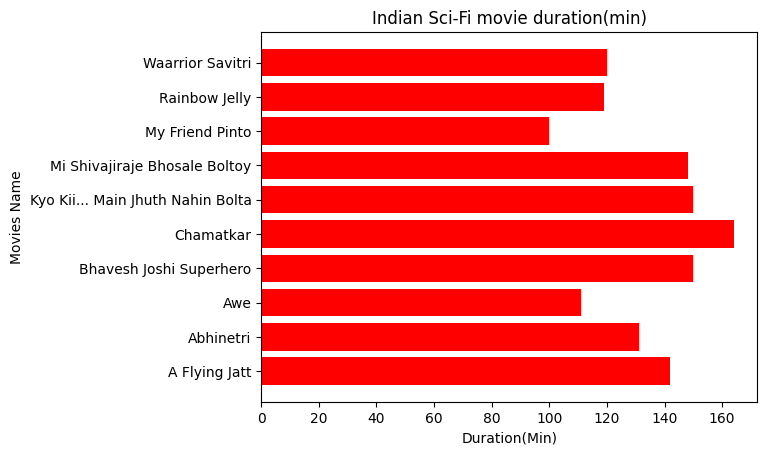

In [25]:
sci_fi = new_data[(new_data.Type.str.contains('Sci-Fi')) & (new_data.Country == "India") ]
plt.barh(sci_fi.Title , sci_fi.Duration.str.replace("min" , "").astype(int) , color="red")
plt.title("Indian Sci-Fi movie duration(min)")
plt.xlabel("Duration(Min)")
plt.ylabel("Movies Name")
plt.show()

## Which country has highest number of TV Shows ?

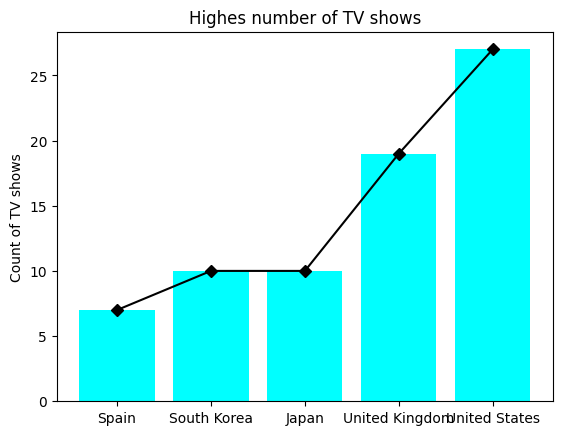

In [51]:
new_data.Category.unique()
data = new_data.loc[new_data.Category == "TV Show"]
dt = data.groupby('Country')['Category'].size().reset_index(name="no of tv show")
dt = dt.sort_values('no of tv show' , ascending = True).tail(5)
plt.plot(dt.Country , dt['no of tv show'] , color="k" , marker="D")
plt.bar(dt.Country , dt["no of tv show"] , color="cyan")
plt.ylabel("Count of TV shows")
plt.title("Highes number of TV shows")
plt.show()